In [2]:
# All the csvs we are reading in has exactly 25 rows
# every 5 row correspond to a particular (# of function, # of DE) combination.
# Which gives us 20 different combos in total.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set up list for API numbers
block_num_list = ["5", "10", "50", "100"]

# Set labels for the x-axis
num_DE = ["10", "100", "500", "1000", "5000"]

# set up median overhead array for all number of APIs
med_array_all = []
# set up std for all number of APIs
std_array_all = []

In [3]:
for block_num in block_num_list:
    med_array = []
    std_array = []
    num_func_name = "block" + block_num
    input_file_path = num_func_name + ".csv"
    output_figure_path = num_func_name + ".png"
    raw_df = pd.read_csv(input_file_path, header=None)
    raw_arr = np.array(raw_df).reshape(5, 5, 5)
    for i in range(len(raw_arr)):
        raw_arr[i] = np.transpose(raw_arr[i])
        raw_arr[i][0] = raw_arr[i][0] + raw_arr[i][2] + raw_arr[i][3] + raw_arr[i][4]
        first_two_comp = raw_arr[i][:2]
        cur_med = np.median(first_two_comp, axis=1)
        cur_std = np.std(first_two_comp, axis=1)
        med_array.append(cur_med)
        std_array.append(cur_std)
    med_array_all.append(np.transpose(med_array))
    std_array_all.append(np.transpose(std_array))

In [4]:
std_array_all[0]

array([[0.00119919, 0.00084278, 0.00030903, 0.00058902, 0.01615369],
       [0.00054029, 0.0002909 , 0.01196185, 0.00069631, 0.03001709]])

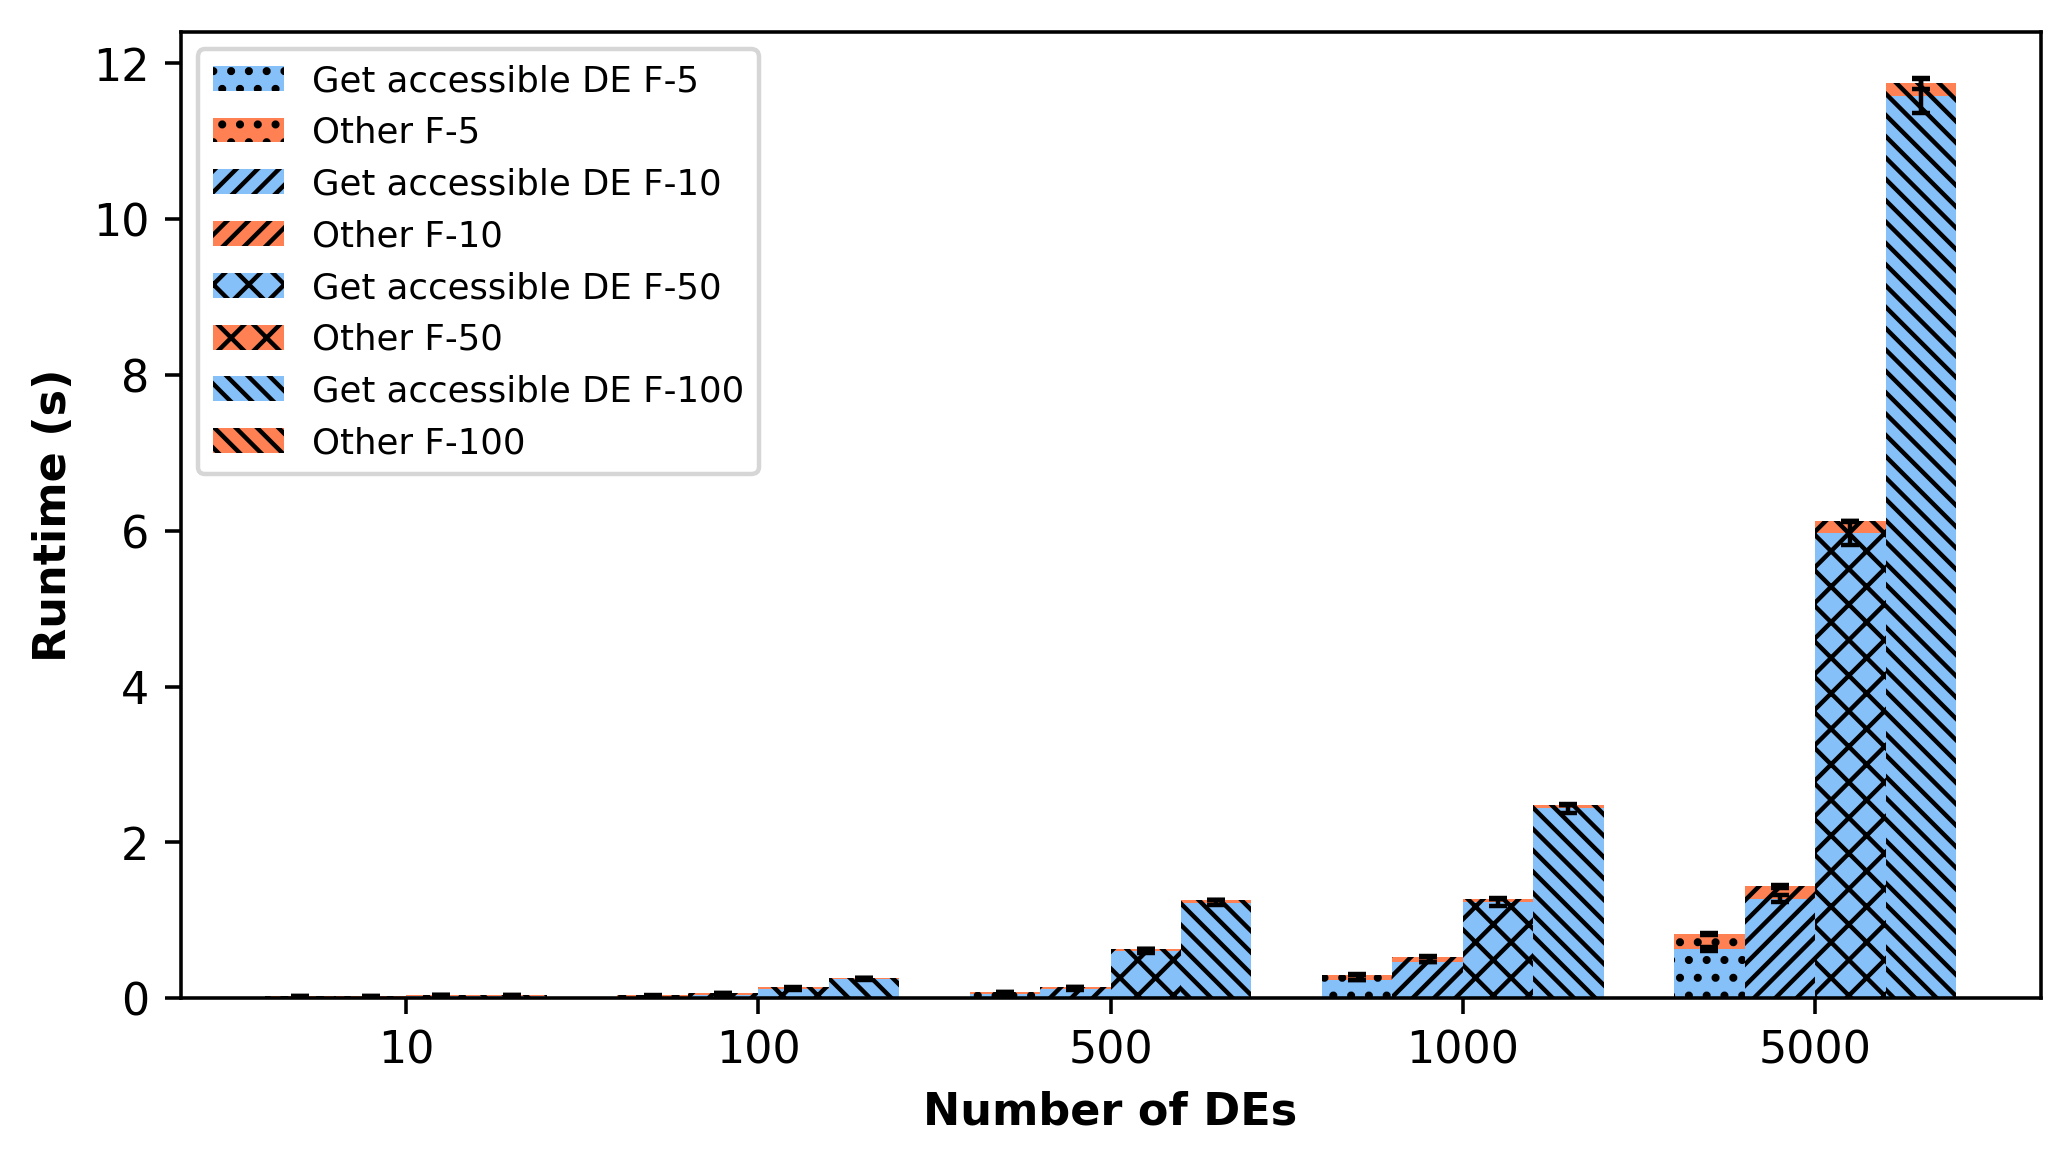

In [6]:
plt.figure(figsize=(7.5, 4), dpi=320)

num_DE_axis = np.arange(len(num_DE))
hatches = ['...','/////','///\\\\\\','\\\\\\\\\\']

for i in range(len(block_num_list)):
    label_one = 'Get accessible DE F-'+block_num_list[i]
    label_two = 'Other F-'+block_num_list[i]
    plt.bar(num_DE_axis-0.3+i*0.2,
            med_array_all[i][1],
            yerr=std_array_all[i][1],
            error_kw={"elinewidth":1,"capsize":2,"capthick":1},
            label=label_one,
            width=0.2,
            color="#85C0F9",
            hatch=hatches[i],
            alpha=.99,
            # edgecolor="black",
            )
    plt.bar(num_DE_axis-0.3+i*0.2,
            med_array_all[i][0],
            yerr=std_array_all[i][0],
            error_kw={"elinewidth":1,"capsize":2,"capthick":1},
            bottom=med_array_all[i][1],
            label=label_two,
            width=0.2,
            color="coral",
            hatch=hatches[i],
            alpha=.99,
            # edgecolor="black",
            )

plt.xticks(num_DE_axis, num_DE)
plt.xlabel("Number of DEs", fontweight="bold")
plt.ylabel("Runtime (s)", fontweight="bold")
plt.legend(prop={'size': 8})
plt.savefig("user_overhead.pdf",
            facecolor='w',
            bbox_inches='tight')